<a href="https://colab.research.google.com/github/norannali/Telco_Customer_Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score,roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

# **Importing the Data**

In [2]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Analysis Data**

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [4]:
df.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 21)

In [7]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.duplicated().sum()

0

In [11]:
#Understanding Churn Rate
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


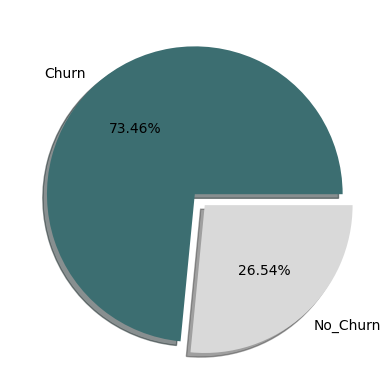

In [12]:
plt.pie(x=df["Churn"].value_counts().values,labels=['Churn','No_Churn'],autopct='%.02f%%',explode=[0, 0.1],
    shadow=True,colors=['#3c6e71','#d9d9d9'])
plt.show()

In [13]:
#value_counts for all columns
for i in df.columns:
  print(df[i].value_counts())
  print("="*50)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    15

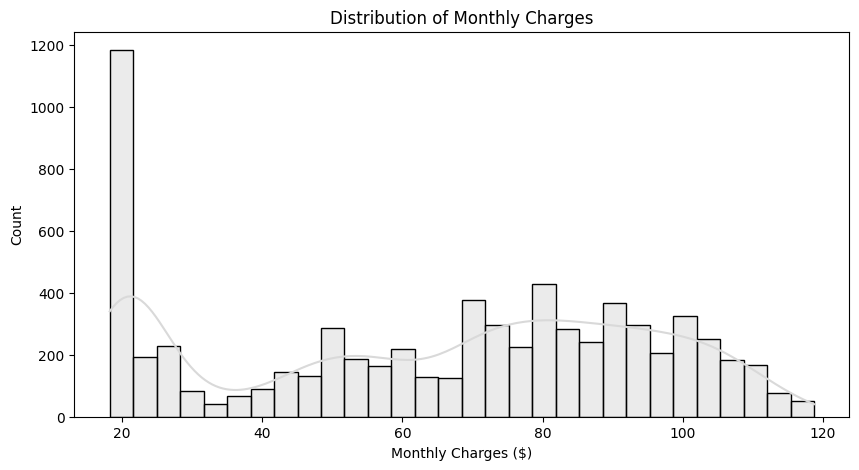

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='#d9d9d9')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()

# Summary of Insights:
 - If churn is higher among low-paying customers (<$30), they might not find enough value in the service.
   → Solution: Improve service offerings or provide better retention offers.
  
 - If churn is higher in the mid-range ($30-$70), customers may be exploring competitors.
   → Solution: Analyze competitors and introduce competitive pricing or features.
   
 - If churn is higher in the high-paying segment (>$70), customers may feel the service is too expensive.
   → Solution: Offer premium benefits, loyalty programs, or personalized discounts.

In [15]:
bins=[0,30,70,df['MonthlyCharges'].max()]
labels=['Low','Mid','High']
df['MonthlyCharges_Category']=pd.cut(df['MonthlyCharges'],bins=bins,labels=labels)
churn_rate=df.groupby('MonthlyCharges_Category')['Churn'].value_counts(normalize=True).unstack()
churn_rate

Churn,No,Yes
MonthlyCharges_Category,,
Low,0.901996,0.098004
Mid,0.756502,0.243498
High,0.646386,0.353614


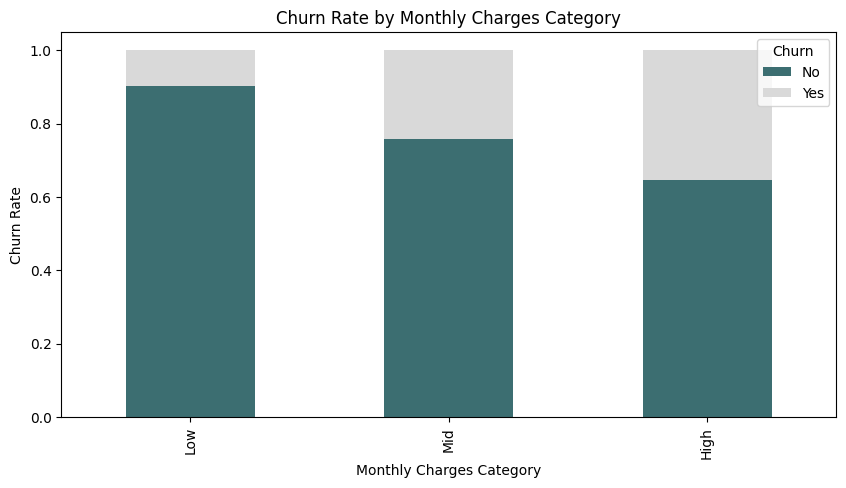

In [16]:
churn_rate.plot(kind='bar',stacked=True,figsize=(10,5),color=['#3c6e71','#d9d9d9'])
plt.title("Churn Rate by Monthly Charges Category")
plt.xlabel("Monthly Charges Category")
plt.ylabel("Churn Rate")
plt.legend(title="Churn")
plt.show()

# Insights from Churn Rate by Monthly Charges Category:
 - Low-paying customers have the lowest churn rate, meaning they are more likely to stay.
 - Mid-range customers have a slightly higher churn rate, indicating possible dissatisfaction or competition.
 - High-paying customers show the highest churn rate, suggesting they may find the service too expensive or not worth the cost.

# Recommendations:
 - For mid-range customers, improve service quality or offer competitive features.
 - For high-paying customers, introduce loyalty programs, discounts, or premium benefits to retain them.

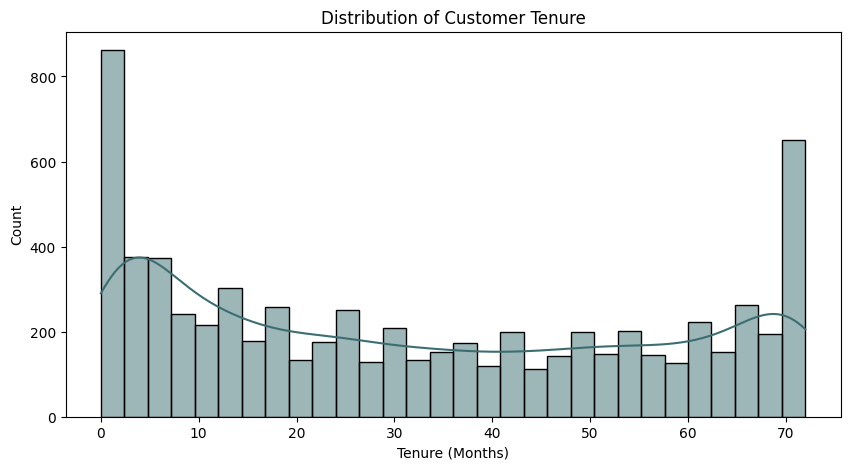

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'], bins=30, kde=True, color='#3c6e71')
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

# Insights from Customer Tenure Distribution:
 - A significant number of customers leave within the first few months, indicating early churn issues.
 - There is another peak at the maximum tenure, suggesting a loyal customer segment.
 - The distribution is fairly spread out, but early-stage retention seems to be a critical challenge.

# Recommendations:
 - Improve the onboarding experience and provide incentives to retain new customers.
 - Identify pain points causing early churn and address them with better support or promotions.
 - Maintain engagement strategies for long-term customers to ensure continued satisfaction.


# **Analyze Categorical Features**

In [18]:
catadorical_features=df.select_dtypes(include=['object']).columns
catadorical_features

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

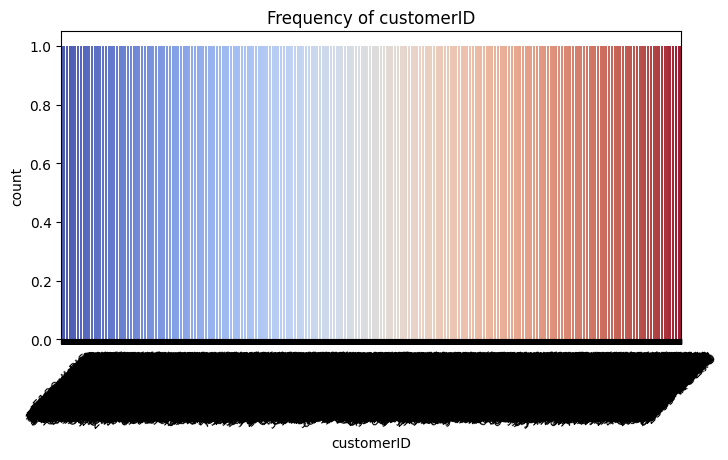

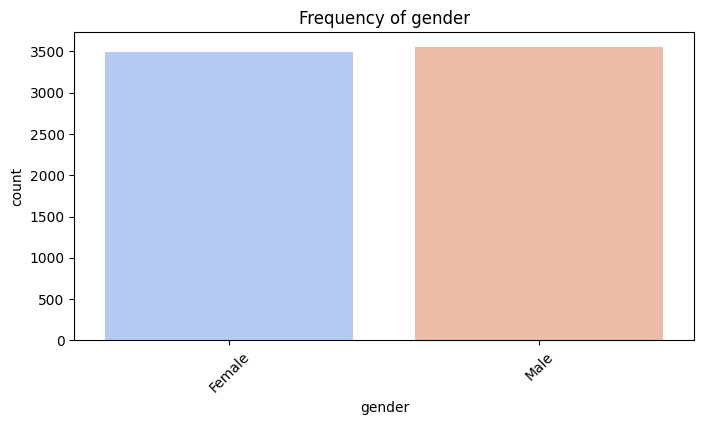

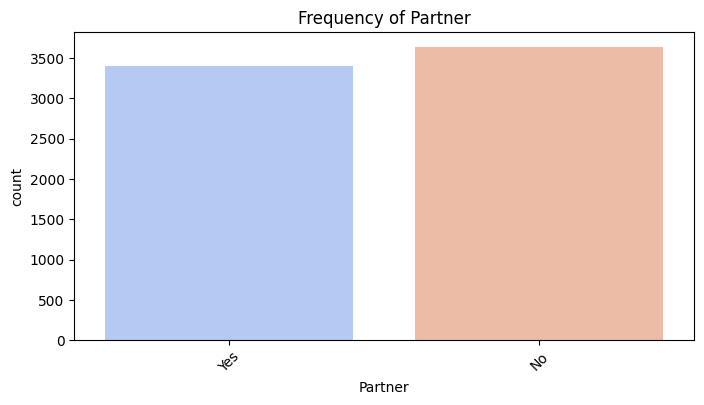

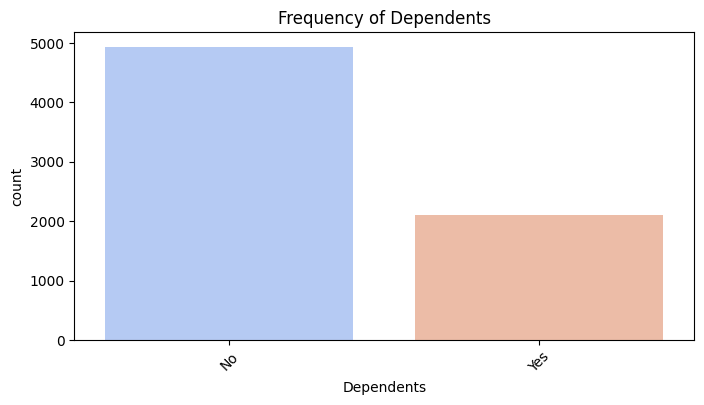

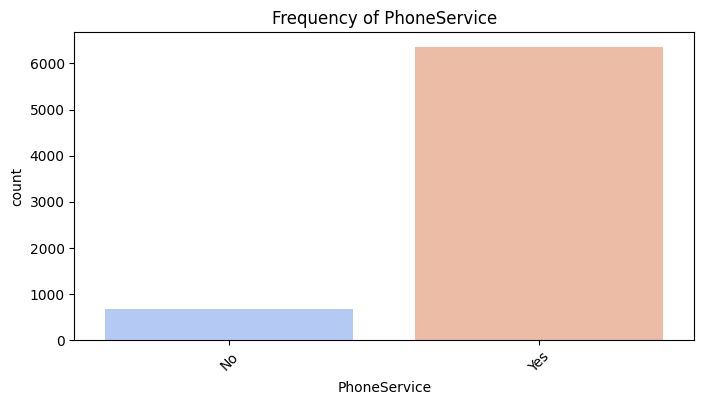

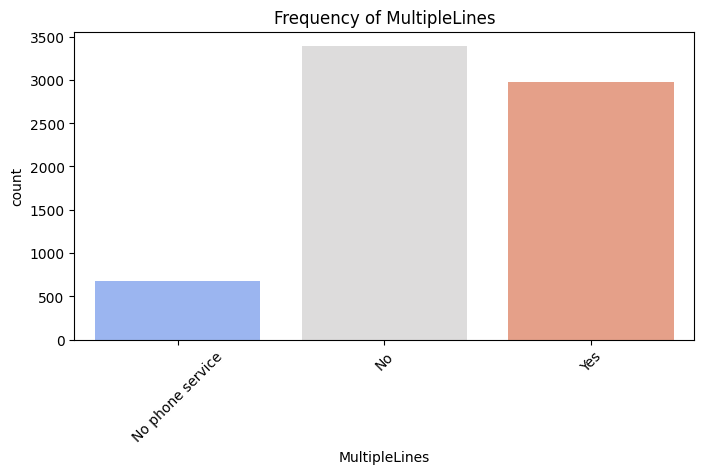

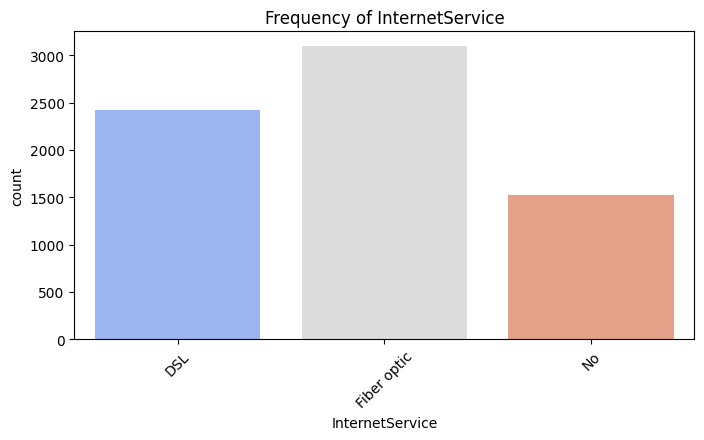

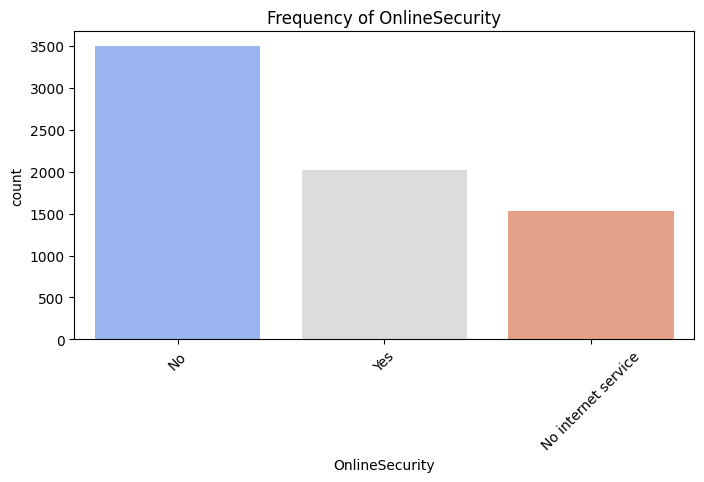

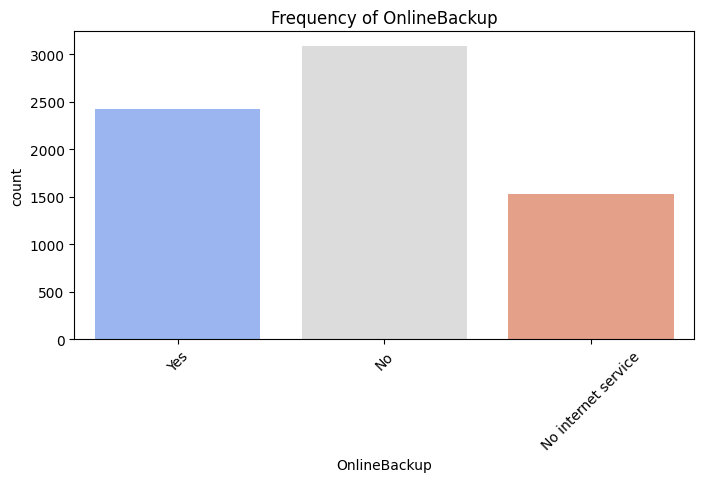

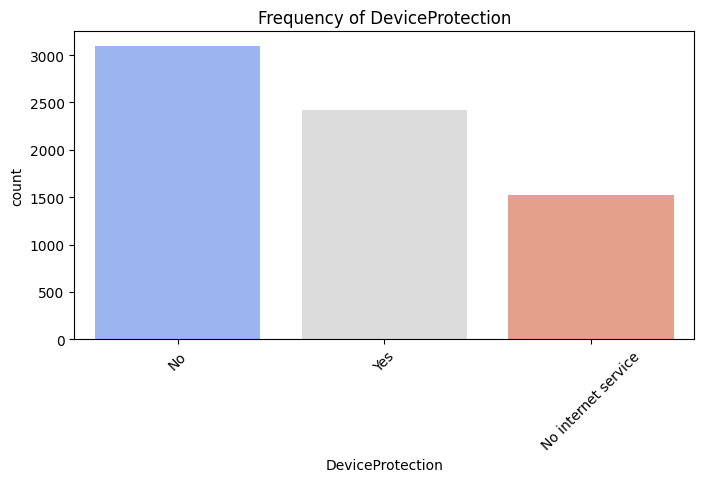

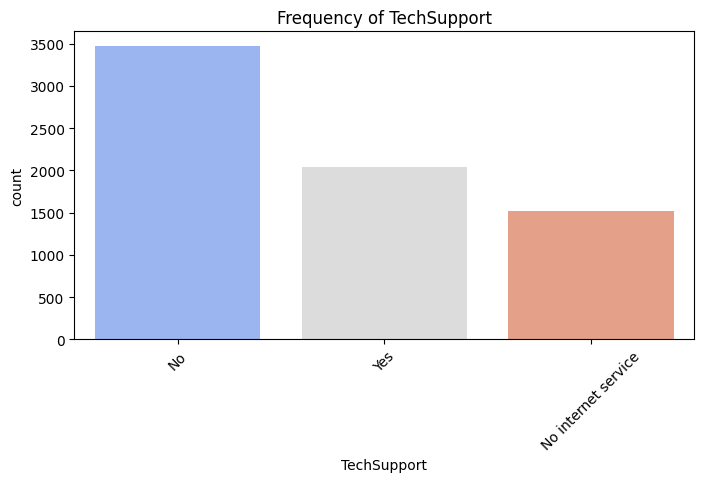

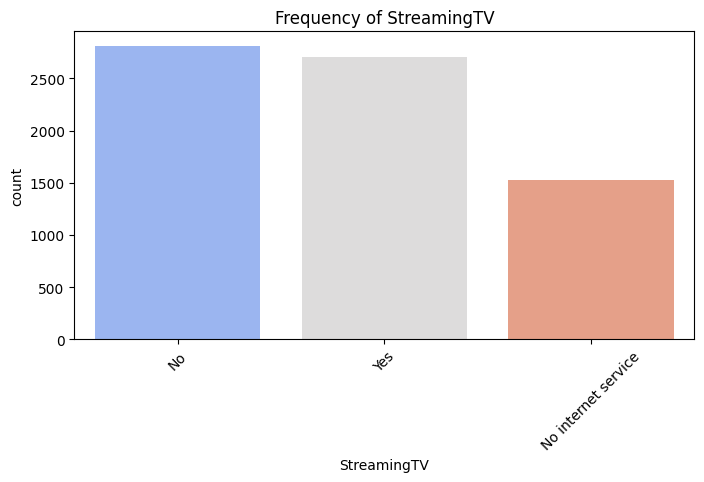

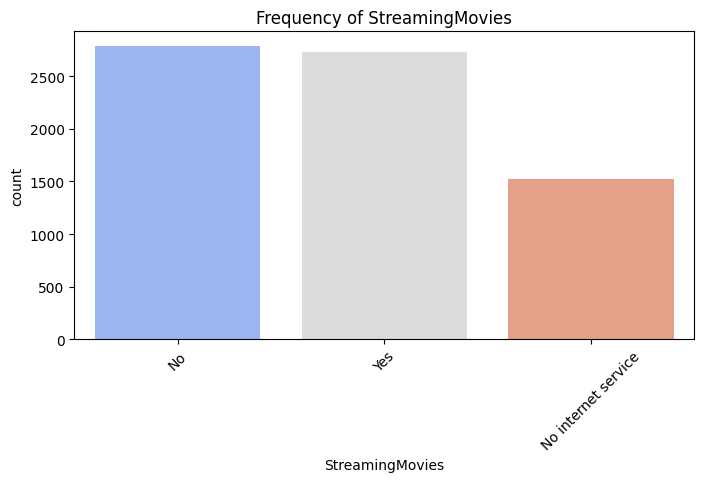

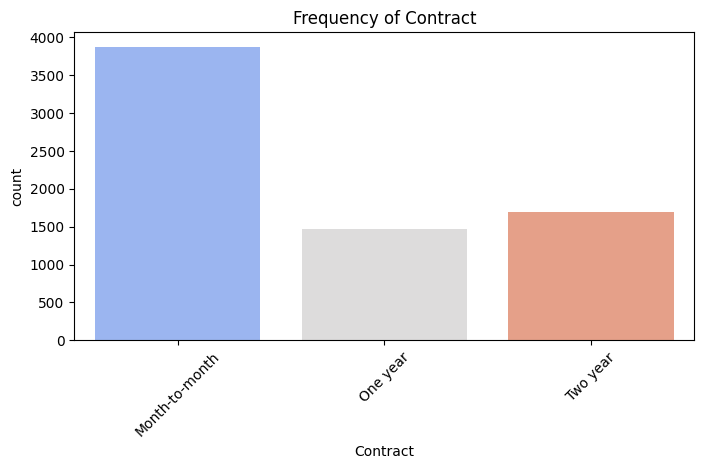

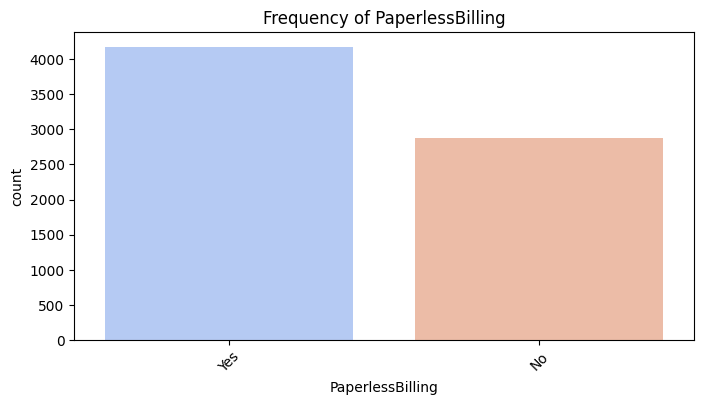

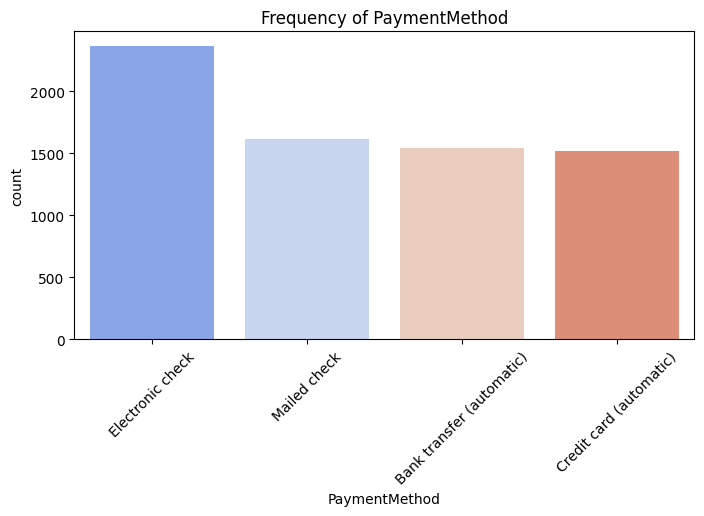

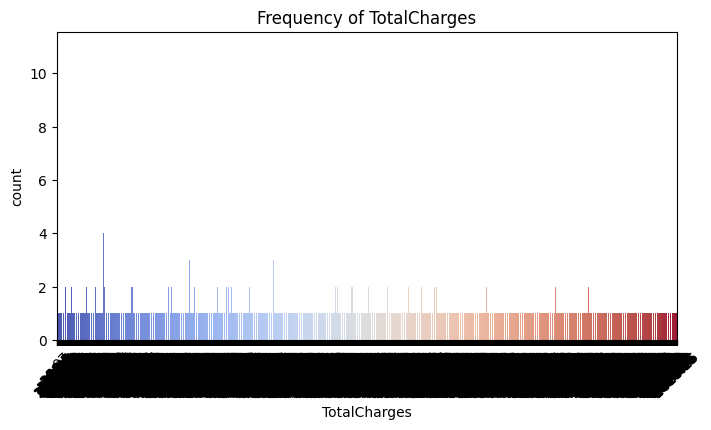

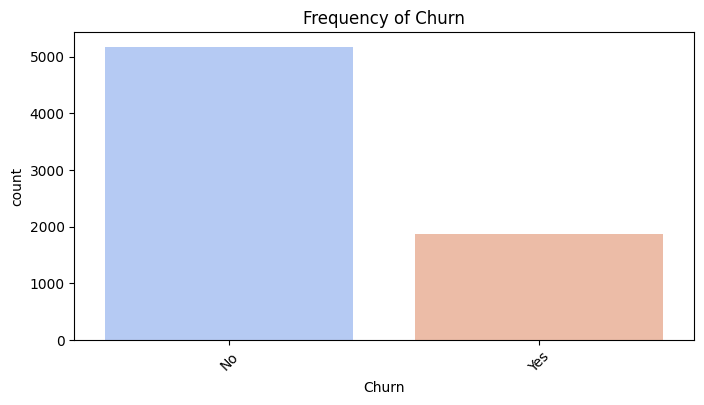

In [19]:
for col in catadorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='coolwarm')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

**customerID**:This column is not a categroical column , unique identifier and does not provide any insight for analysis .

**TotalCharges** : should be a numerical feature because it represents an amount of money.

In [20]:
# List of categorical columns to analyze
categorical_cols = ['InternetService', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod','PaperlessBilling',]


for col in categorical_cols:
    counts = df[col].value_counts(normalize=True) * 100  # Get percentages
    counts = counts.round(2).astype(str) + "%"

    print(f"\n{col} Distribution:\n{counts}\n")

    # Generate a dynamic insight based on the highest category
    most_common = counts.idxmax()     #gets the most frequently occurring (highest percentage) category from the column.
    print(f"=============== Most customers prefer '{most_common}' in {col} ===============\n")



InternetService Distribution:
InternetService
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'Fiber optic' in InternetService ===============


OnlineBackup Distribution:
OnlineBackup
No                     43.84%
Yes                    34.49%
No internet service    21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'No' in OnlineBackup ===============


DeviceProtection Distribution:
DeviceProtection
No                     43.94%
Yes                    34.39%
No internet service    21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'No' in DeviceProtection ===============


TechSupport Distribution:
TechSupport
No                     49.31%
Yes                    29.02%
No internet service    21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'No' in TechSupport ===============


StreamingTV Distribution:
StreamingT

# **Insights & Recommendations for Categorical Columns**

## 1. Internet Service  
🔍 **Insight:** Most customers prefer **Fiber Optic** over DSL or having no internet service.  
✅ **Recommendation:** Invest in improving **Fiber Optic** infrastructure, offer promotions to attract **DSL users**, and encourage customers without internet to subscribe with special offers.  

## 2. Online Backup  
🔍 **Insight:** A significant number of customers **do not use Online Backup services**.  
✅ **Recommendation:** Increase awareness of **data security benefits** and offer **bundled plans** or **discounted add-ons** to encourage adoption.  

## 3. Device Protection  
🔍 **Insight:** Many customers **do not opt for Device Protection services**.  
✅ **Recommendation:** Educate customers on the importance of **Device Protection** through marketing campaigns, offer **trial periods**, or bundle it with internet services.  

## 4. Tech Support  
🔍 **Insight:** A majority of customers **do not use Tech Support services**.  
✅ **Recommendation:** Improve customer awareness about the **benefits of Tech Support**, offer **24/7 support**, and provide **discounted support packages** to increase engagement.  

## 5. Streaming TV  
🔍 **Insight:** Many customers **do not subscribe to Streaming TV services**.  
✅ **Recommendation:** Offer **exclusive content**, bundle Streaming TV with internet plans, and provide **discounted packages** to increase subscriptions.  

## 6. Streaming Movies  
🔍 **Insight:** A large portion of customers **do not use Streaming Movies services**.  
✅ **Recommendation:** Promote **partnerships with popular streaming platforms**, offer **exclusive deals**, and introduce **trial periods** to attract more users.  

## 7. Contract Type  
🔍 **Insight:** Most customers prefer **Month-to-Month contracts** rather than long-term plans.  
✅ **Recommendation:** Encourage long-term contracts by offering **loyalty rewards, discounted annual plans, or value-added services**.  

## 8. Payment Method  
🔍 **Insight:** The most preferred payment method is **Electronic Check**.  
✅ **Recommendation:** Promote **more convenient payment methods** such as **credit cards, automatic bank transfers, or digital wallets** for better customer experience.  

## 9. Paperless Billing  
🔍 **Insight:** A majority of customers **prefer Paperless Billing**.  
✅ **Recommendation:** Continue promoting **paperless billing** for sustainability and cost reduction while encouraging remaining users to switch by offering **small incentives**.  


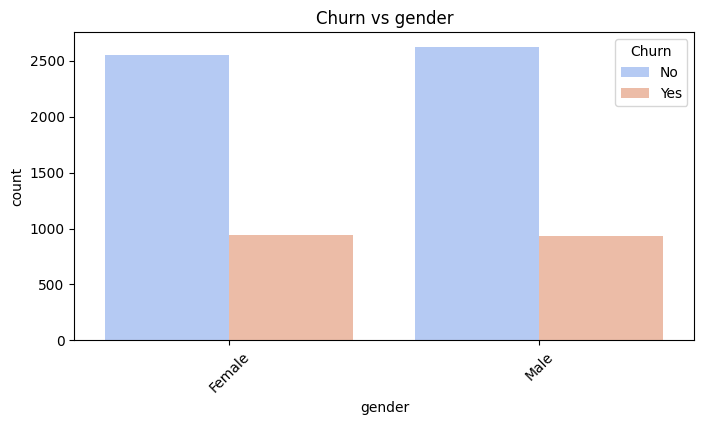

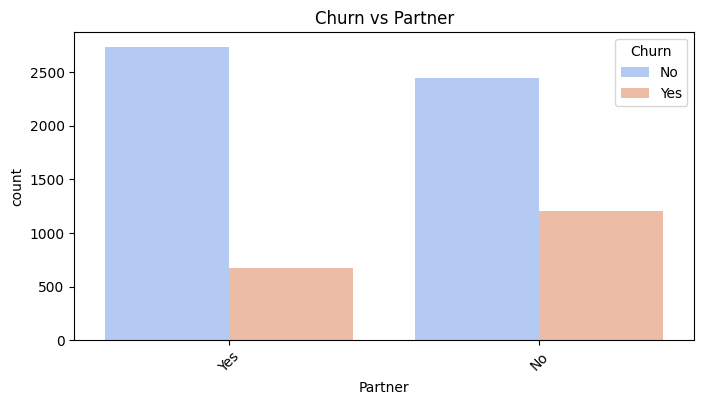

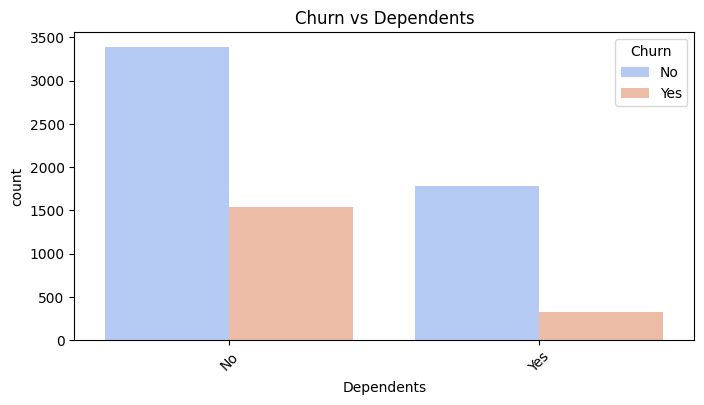

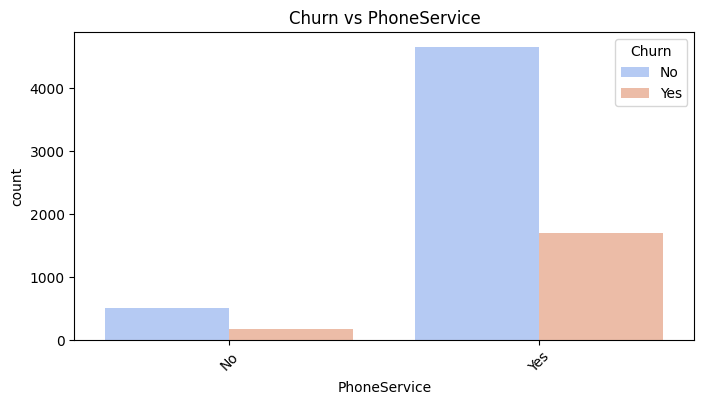

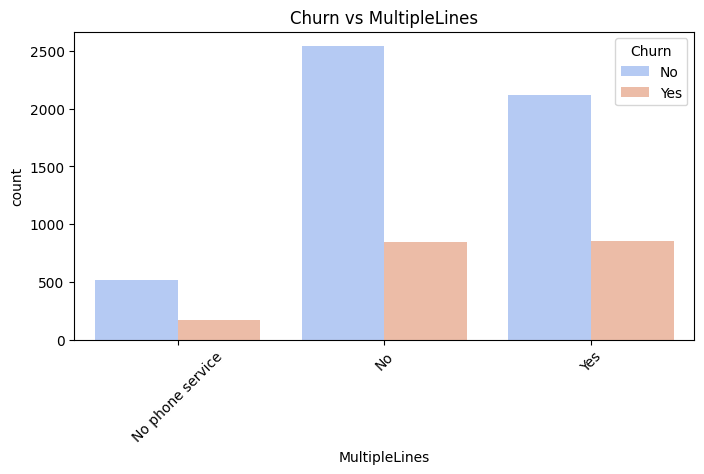

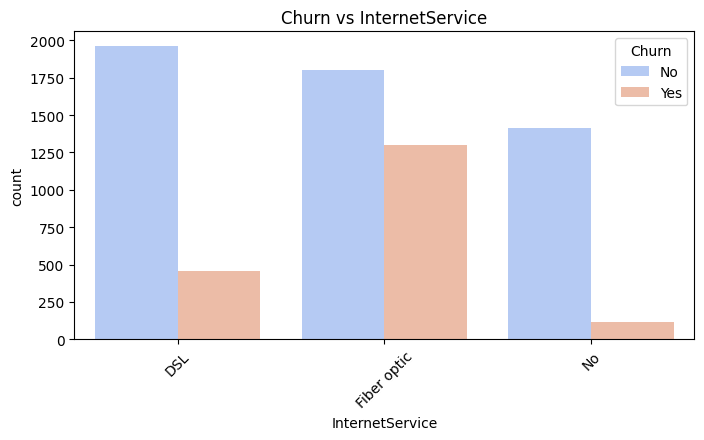

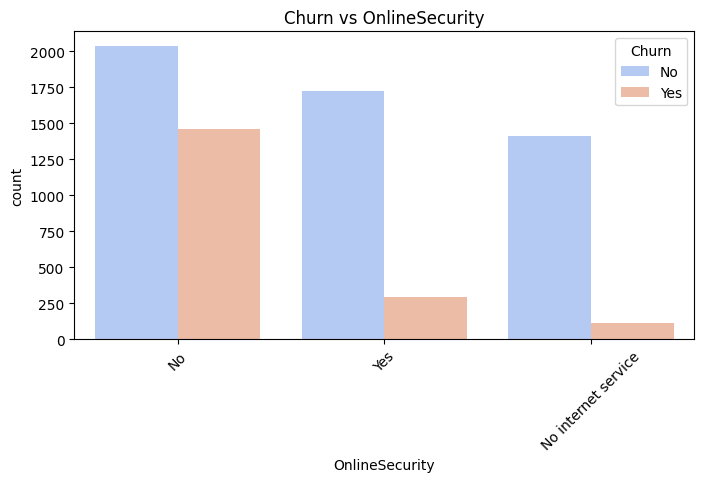

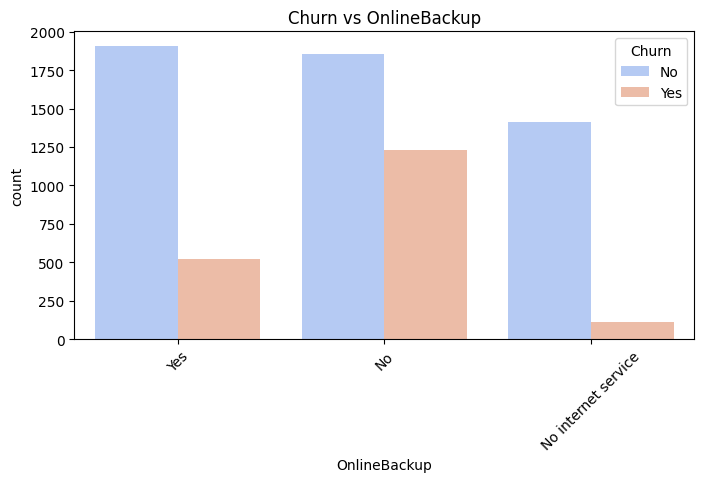

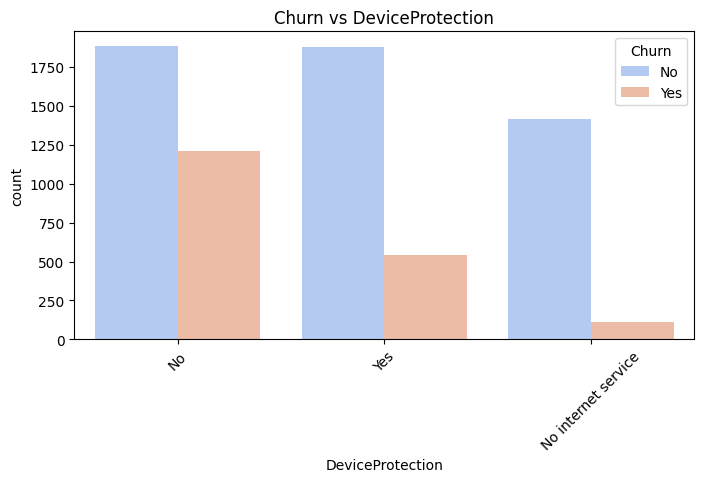

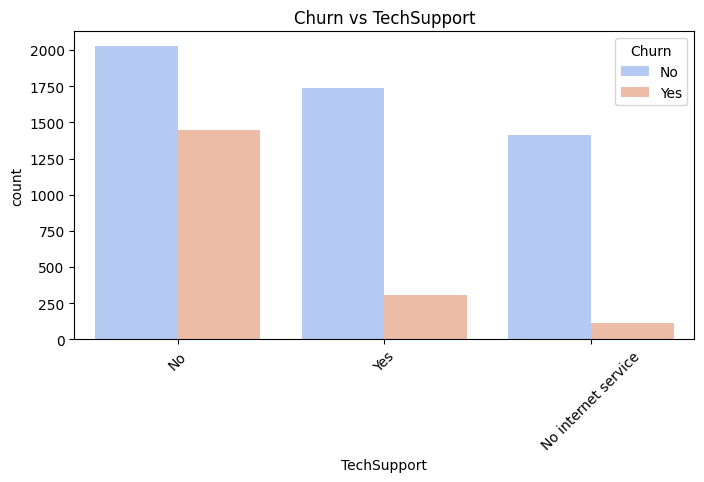

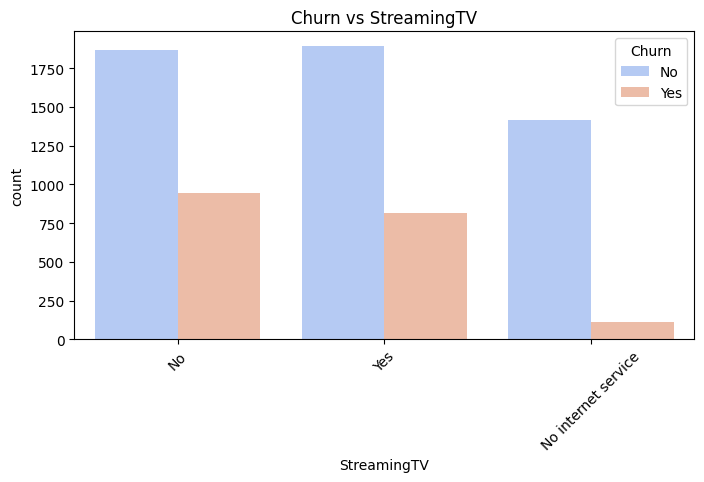

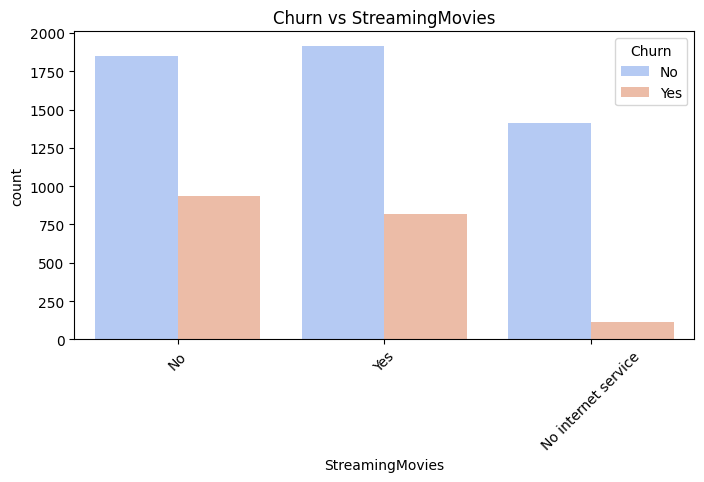

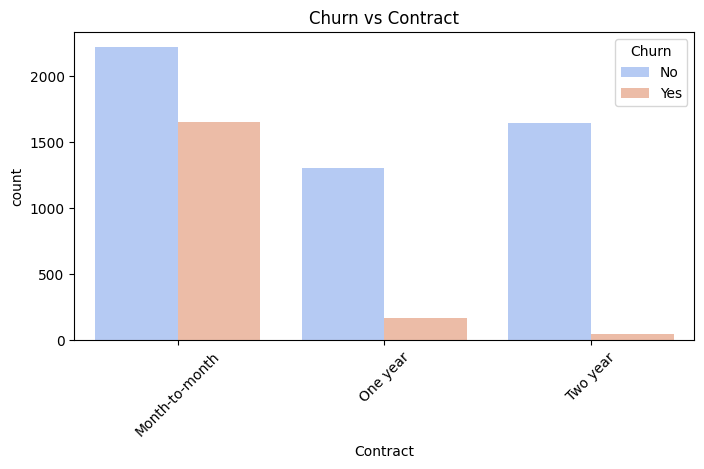

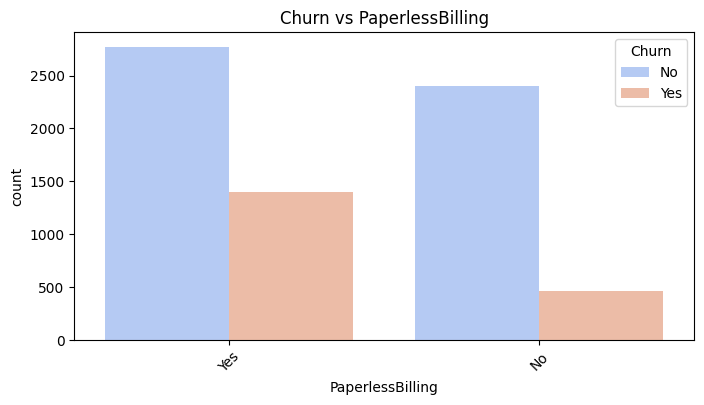

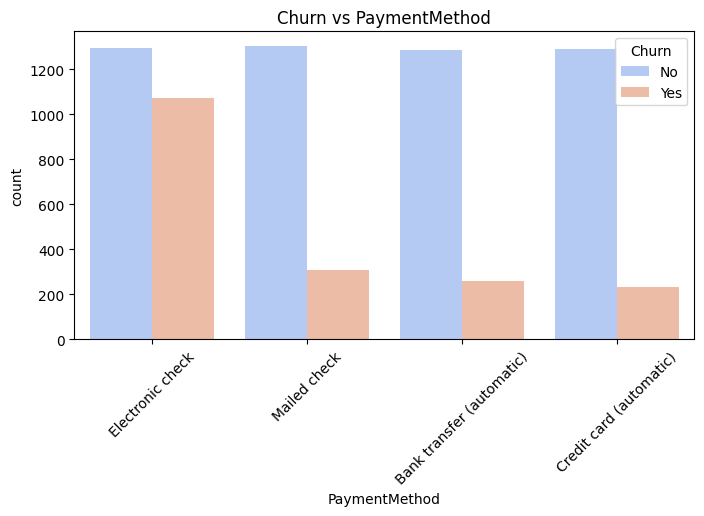

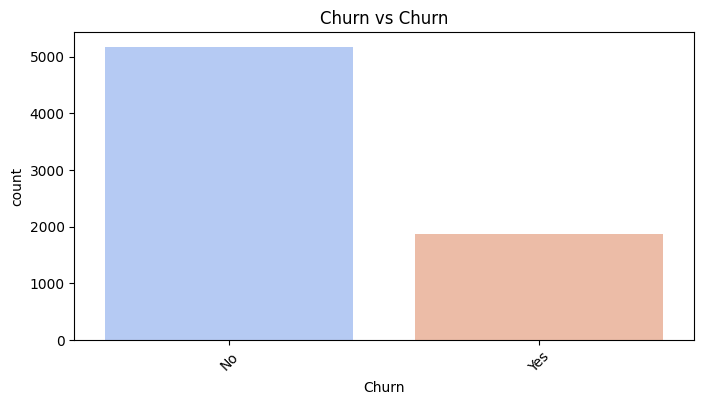

In [21]:
# Churn vs Categorical Features
catadorical_features=catadorical_features.drop(['customerID','TotalCharges'])
for col in catadorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.title(f'Churn vs {col}')
    plt.xticks(rotation=45)
    plt.show()

# **Churn Analysis Based on Categorical Features**

🔍 **Insight:**  
The distribution of churn varies across different categorical features. Certain categories, such as Month-to-Month contracts and Electronic Check payment methods, may show higher churn rates compared to others.  

✅ **Recommendation:**  
- Identify the categories with higher churn and offer retention strategies such as discounts, loyalty programs, or better customer support.  
- Encourage customers to switch to lower-churn categories (e.g., long-term contracts or more secure payment methods) through incentives.  
- Analyze customer feedback to understand the reasons behind high churn in specific groups and address their concerns effectively.


In [22]:
numerical_features=df.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [23]:
# Senior Citizen Analysis
senior_counts = df['SeniorCitizen'].value_counts(normalize=True) * 100
senior_counts = senior_counts.round(2).astype(str) + "%"  # Round and format

print("Senior Citizen Distribution:\n", senior_counts)

# Generate an insight based on the majority
most_common_senior = senior_counts.idxmax()
print(f"=============== Most customers are '{'Non-Senior Citizens' if most_common_senior == 0 else 'Senior Citizens'}' ===============")


Senior Citizen Distribution:
 SeniorCitizen
0    83.79%
1    16.21%
Name: proportion, dtype: object
=============== Most customers are 'Non-Senior Citizens' ===============


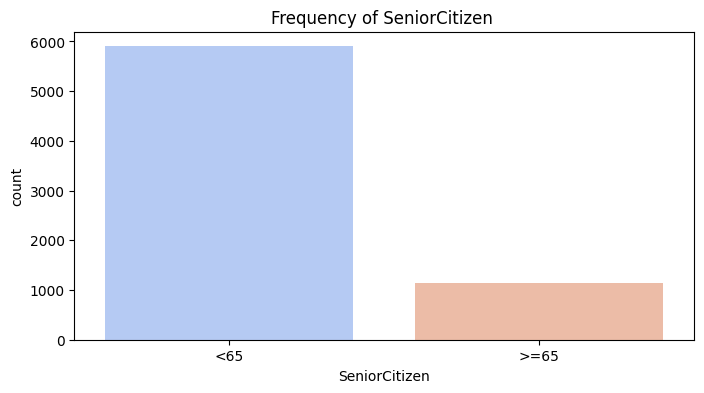

In [24]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=df['SeniorCitizen'], palette='coolwarm')
plt.title(f'Frequency of SeniorCitizen ')
plt.xticks(ticks=[0, 1], labels=['<65', '>=65'])
plt.show()

# **Insight from the Senior Citizen Distribution**  

🔍 **Insight:**  
The majority of customers in the dataset are non-senior citizens, while only a small portion of them are senior citizens. This suggests that younger or middle-aged customers dominate the customer base.  

✅ **Recommendation:**  
- Consider offering special discounts or tailored plans for senior citizens to encourage more engagement.  
- Improve customer support and simplify digital services for senior citizens to enhance their experience.  
- If senior citizens have a higher churn rate, analyze their specific needs and introduce user-friendly service options to retain them.  


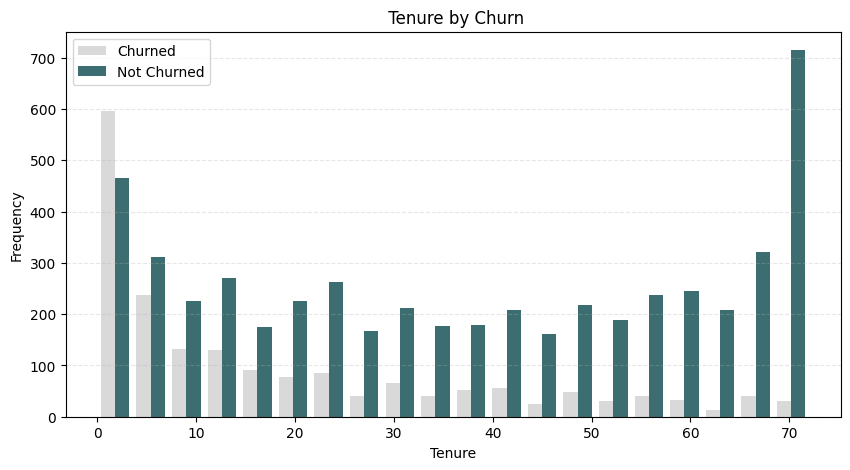

In [25]:
#Visualise numeric features
#tenure
churned=df[df["Churn"]=="Yes"]
not_churned=df[df["Churn"]=="No"]

plt.figure(figsize=(10,5))
plt.hist([churned["tenure"],not_churned["tenure"]],bins=20,label=["Churned","Not Churned"],color=['#d9d9d9','#3c6e71'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

**Shorter Tenure, Higher Churn**
* This suggests that newer customers are more likely to leave, possibly due to unmet expectations or dissatisfaction.

**Longer Tenure, Lower Churn**
* Long-term customers may have developed loyalty or found value in the service.

**Mid-Tenure (12-24 Months) Shows Mixed Trends**

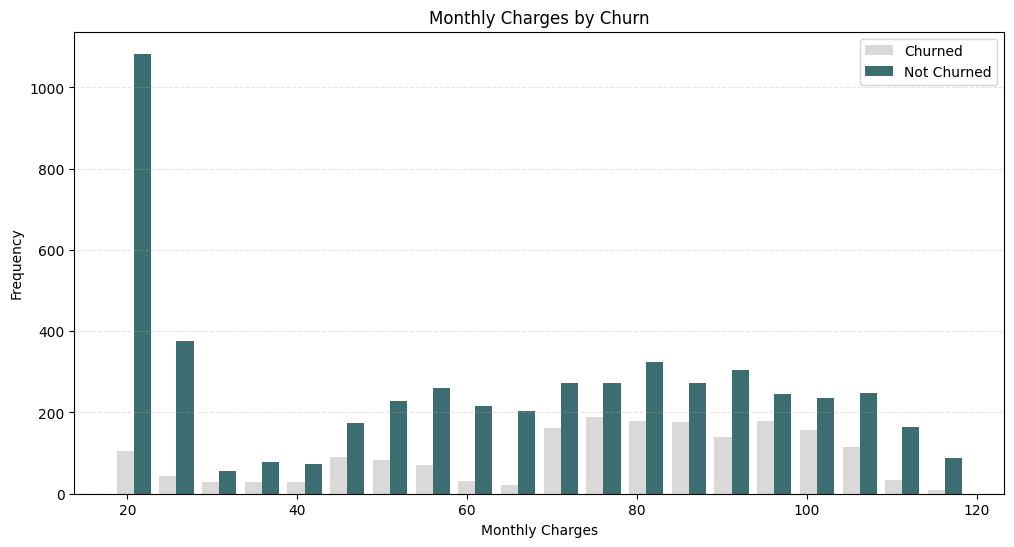

In [26]:
#Monthly charge
churned=df[df["Churn"]=="Yes"]
not_churned=df[df["Churn"]=="No"]

plt.figure(figsize=(12,6))
plt.hist([churned['MonthlyCharges'],not_churned['MonthlyCharges']],bins=20,label=["Churned","Not Churned"],color=['#d9d9d9','#3c6e71'])
plt.title('Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)


In [27]:
# Total Charges Indicates the customer’s total charges, calculated to the end of the quarter specified above.
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [28]:
df['TotalCharges']=df.apply(lambda x: x['MonthlyCharges'] if x['TotalCharges'] == ' ' else x['TotalCharges'], axis=1)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
print(df['TotalCharges'].isnull().sum())

0


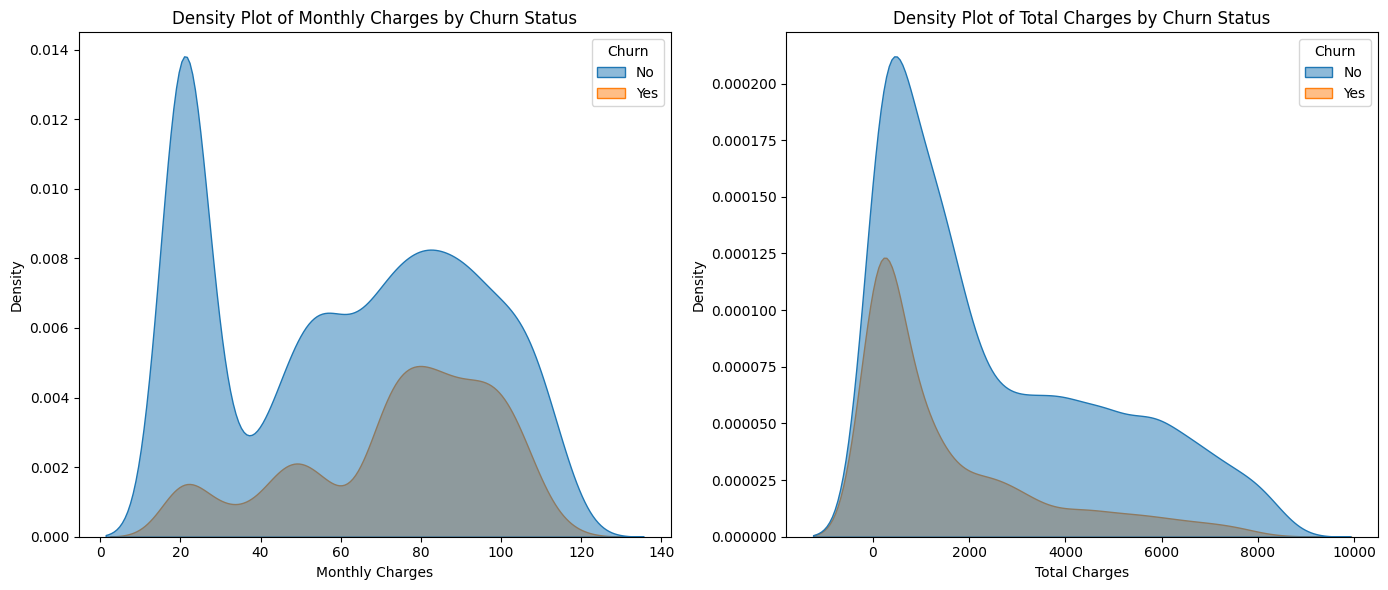

In [29]:
# Visualizes the impact of Monthly and Total Charges on churn to identify pricing-related churn patterns.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x='MonthlyCharges', hue="Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x='TotalCharges', hue="Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Insight
* Churn is more common among customers with higher monthly charges, indicating that expensive plans might contribute to customer attritio

* Customers with lower total charges have a higher churn rate.

# Recommendations:
* Offer incentives or better onboarding experiences for new customers to reduce early churn.
* Provide flexible or lower-cost plans to retain customers with higher monthly charges.








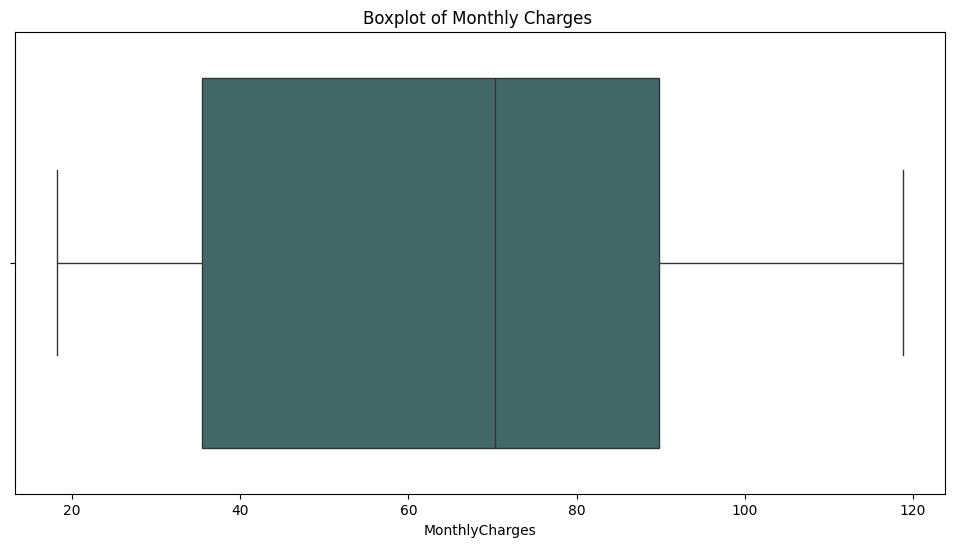

In [30]:
#Check Outliers Using Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='MonthlyCharges',palette=['#3c6e71','#d9d9d9'])
plt.title('Boxplot of Monthly Charges ')
plt.show()

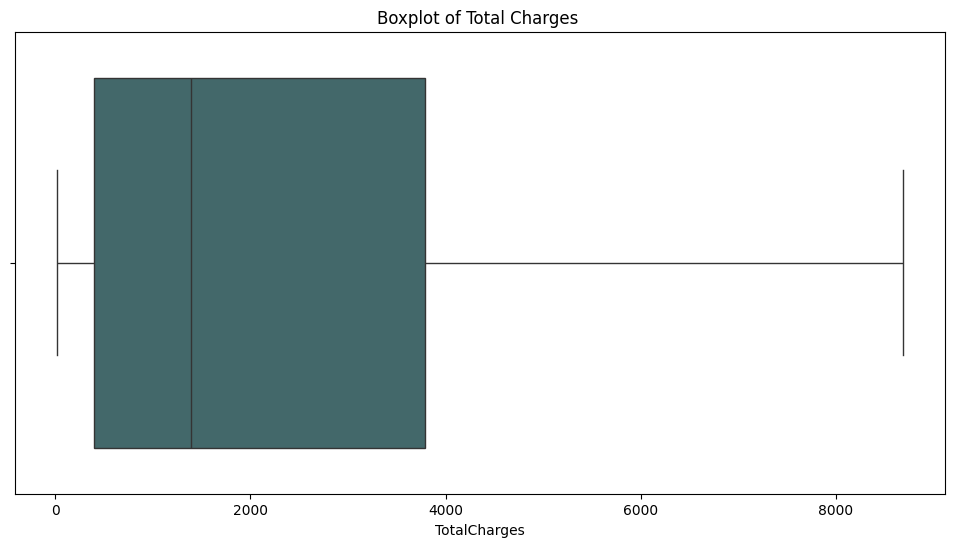

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='TotalCharges',palette=['#3c6e71','#d9d9d9'])
plt.title('Boxplot of Total Charges ')
plt.show()

**Correlation Heatmap for numerical columns**

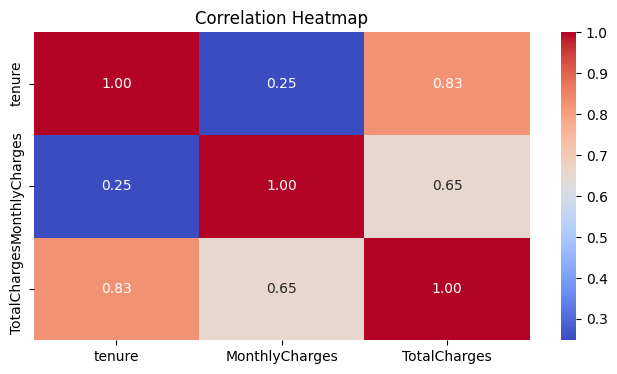

In [32]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## **Data Preprocessing**

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Mid
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Mid
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Mid
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,High


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customerID               7043 non-null   object  
 1   gender                   7043 non-null   object  
 2   SeniorCitizen            7043 non-null   int64   
 3   Partner                  7043 non-null   object  
 4   Dependents               7043 non-null   object  
 5   tenure                   7043 non-null   int64   
 6   PhoneService             7043 non-null   object  
 7   MultipleLines            7043 non-null   object  
 8   InternetService          7043 non-null   object  
 9   OnlineSecurity           7043 non-null   object  
 10  OnlineBackup             7043 non-null   object  
 11  DeviceProtection         7043 non-null   object  
 12  TechSupport              7043 non-null   object  
 13  StreamingTV              7043 non-null   object  
 14  Streamin

In [35]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [36]:
df.duplicated().sum()

0

In [37]:
catadorical_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [38]:
df.drop(['customerID'],axis=1,inplace=True)

In [39]:
#Label encoding of target column
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [40]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,Mid
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Mid


# Label encoding of categorical fetaures

In [41]:
df['MonthlyCharges_Category']=df['MonthlyCharges_Category'].replace({'Low':0,'Mid':1,'High':2})

In [42]:
categorical_cols=df.select_dtypes(include=['object']).columns
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [43]:
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,1
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,1
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,2


In [44]:
#scalling
scaler=StandardScaler()
df[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category
0,0,0,1,0,-1.277445,0,1,0,0,2,...,0,0,0,0,1,2,-1.160323,-0.992667,0,0
1,1,0,0,0,0.066327,1,0,0,2,0,...,0,0,0,1,0,3,-0.259629,-0.172198,0,1
2,1,0,0,0,-1.236724,1,0,0,2,2,...,0,0,0,0,1,3,-0.362660,-0.958122,1,1
3,1,0,0,0,0.514251,0,1,0,2,0,...,2,0,0,1,0,0,-0.746535,-0.193706,0,1
4,0,0,0,0,-1.236724,1,0,1,0,0,...,0,0,0,0,1,2,0.197365,-0.938930,1,2


# **Traianing and test data split**

In [45]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [46]:
#Handeling Imbalanced Using SMOTE
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

In [47]:
#Splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [48]:
#Feature Scalling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train_smote=scaler.fit_transform(X_train_smote)
X_test_smote=scaler.transform(X_test_smote)

In [49]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [50]:
#dic of models
models={
    "Random Forest": RandomForestClassifier(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVC': SVC(random_state=42,probability=True) ,
}

Results on original data
Random Forest - Accuracy: 0.7999, AUC-ROC: 0.6949
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

--------------------------------------------------


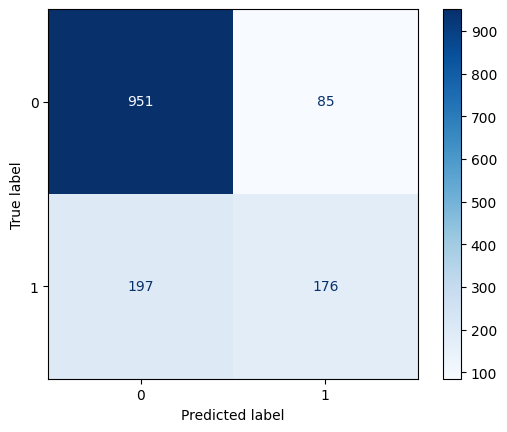

DecisionTreeClassifier - Accuracy: 0.7289, AUC-ROC: 0.6561
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.49      0.50      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409

--------------------------------------------------


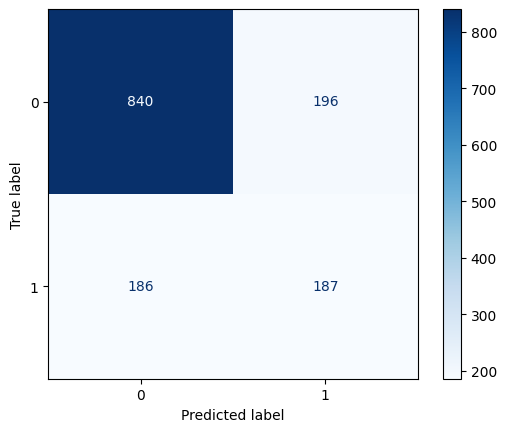

Logistic Regression - Accuracy: 0.8148, AUC-ROC: 0.7394
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

--------------------------------------------------


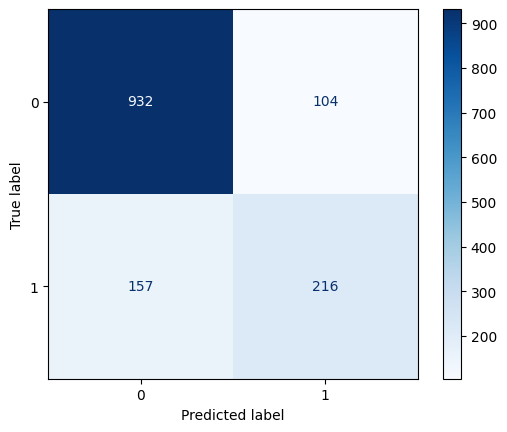

SVC - Accuracy: 0.8070, AUC-ROC: 0.7109
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

--------------------------------------------------


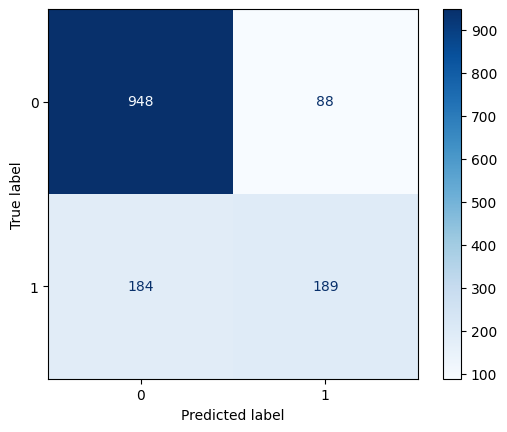

In [51]:
results = []

# Train models and store results
print("Results on original data")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC-ROC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Append results to the list
    results.append([name, accuracy, 'Original'])


imbalanced data >>use SMOTE

**Synthetic Minority Oversampling TEchnique (SMOTE)**

In [52]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
X_train_smote = imputer.fit_transform(X_train_smote)
X_test_smote = imputer.transform(X_test_smote) # Apply the transform to X_test_smote as well


Results on SMOTE Data
Random Forest - Accuracy: 0.8507, AUC-ROC: 0.9220
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1021
           1       0.84      0.87      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

--------------------------------------------------


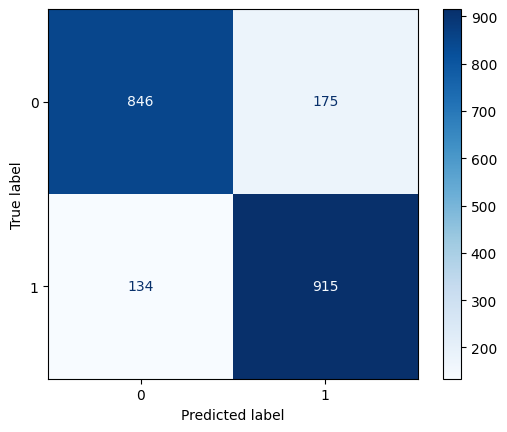

DecisionTreeClassifier - Accuracy: 0.7894, AUC-ROC: 0.7897
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1021
           1       0.79      0.80      0.79      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

--------------------------------------------------


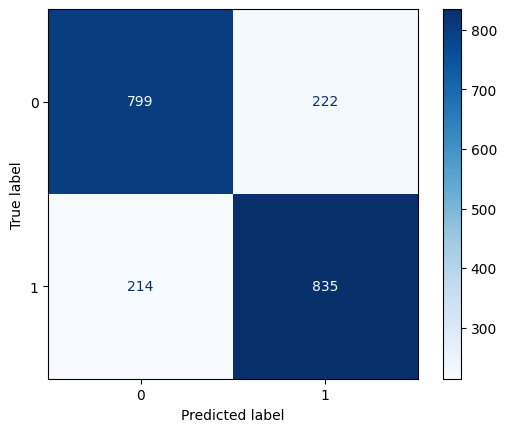

Logistic Regression - Accuracy: 0.7932, AUC-ROC: 0.8760
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1021
           1       0.77      0.85      0.81      1049

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070

--------------------------------------------------


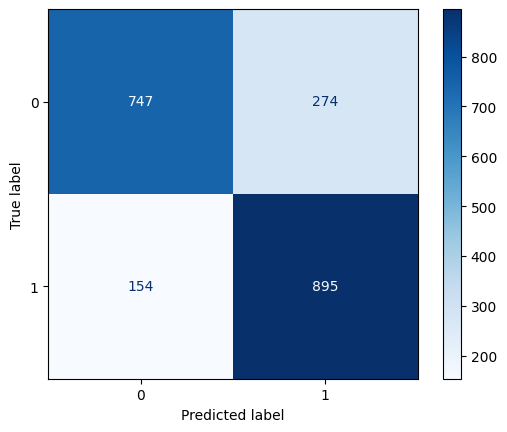

SVC - Accuracy: 0.8159, AUC-ROC: 0.8857
              precision    recall  f1-score   support

           0       0.85      0.77      0.80      1021
           1       0.79      0.86      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

--------------------------------------------------


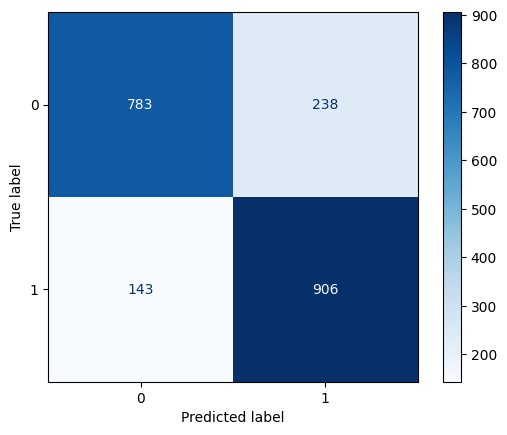

In [53]:
# Training and Evaluating Models on SMOTE Data
print("Results on SMOTE Data")
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test_smote)
    accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
    roc_auc_smote = roc_auc_score(y_test_smote, model.predict_proba(X_test_smote)[:, 1])
    print(f"{name} - Accuracy: {accuracy_smote:.4f}, AUC-ROC: {roc_auc_smote:.4f}")
    print(classification_report(y_test_smote, y_pred_smote))
    print("-" * 50)
    cm = confusion_matrix(y_test_smote,y_pred_smote)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Append results to the list
    results.append([name, accuracy_smote, 'SMOTE'])

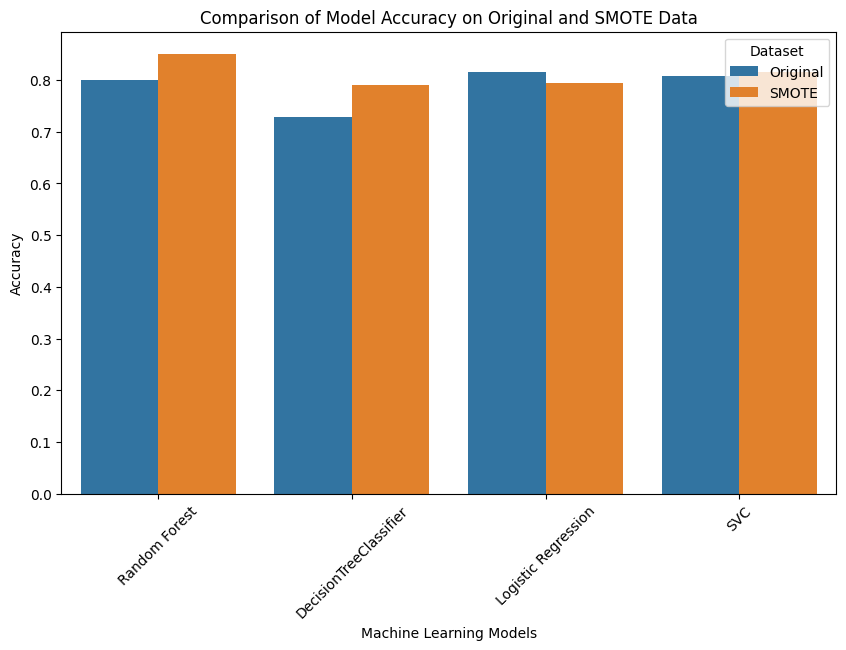

In [54]:
# Create the DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Dataset"])

# Visualization of Model Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", hue="Dataset", data=results_df)
plt.xticks(rotation=45)
plt.title("Comparison of Model Accuracy on Original and SMOTE Data")
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Models")
plt.legend(title="Dataset")
plt.show()

In [55]:
# Hyperparameter Tuning for Best Model (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [56]:
print("Best Random Forest Model:", grid_search.best_params_)
y_pred_best = grid_search.best_estimator_.predict(X_test_smote)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test_smote, y_pred_best))

Best Random Forest Model: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.8521739130434782


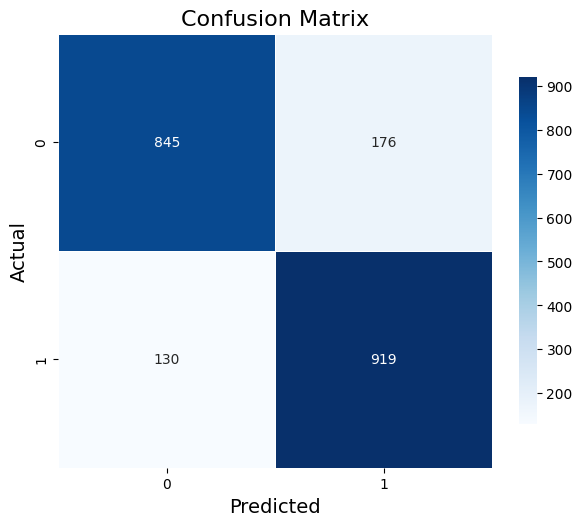

In [57]:
#visulize best
cm = confusion_matrix(y_test_smote, y_pred_best)
sns.set_palette("Blues")
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})
# Customizing labels
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
# Show the plot
plt.show()

# **Model Training**

In [58]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.83
----------------------------------------------------------------------
Training DecisionTreeClassifier with default parameters
DecisionTreeClassifier cross-validation accuracy: 0.76
----------------------------------------------------------------------
Training Logistic Regression with default parameters
Logistic Regression cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training SVC with default parameters
SVC cross-validation accuracy: 0.80
----------------------------------------------------------------------


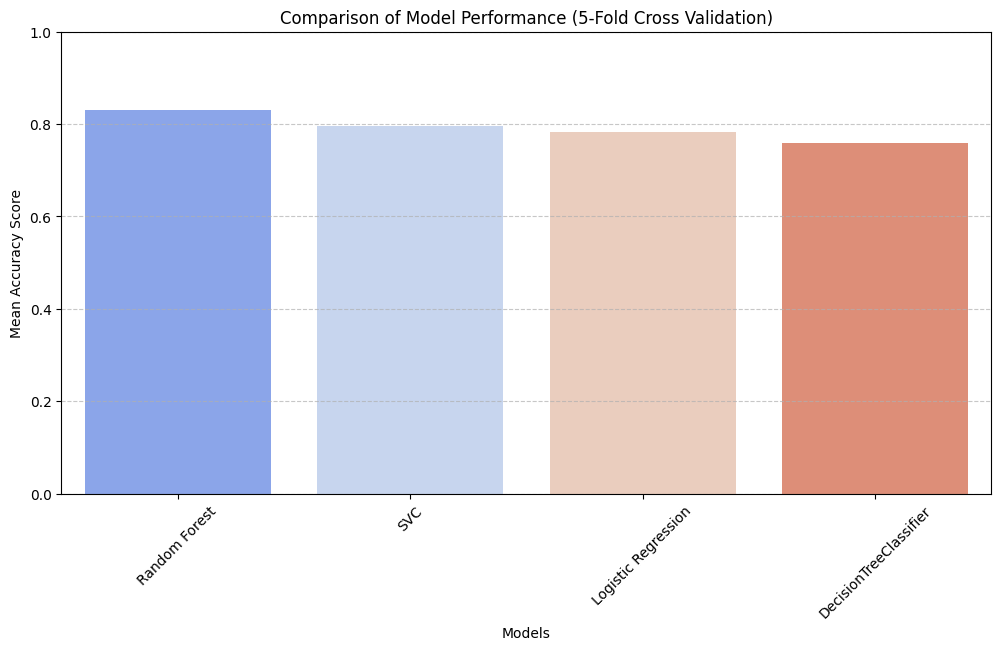

In [59]:
cv_scores_df = pd.DataFrame.from_dict(cv_scores, orient='index', columns=['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5'])

# Calculate the mean accuracy for each model
cv_scores_df['Mean Accuracy'] = cv_scores_df.mean(axis=1)

# Sort models by mean accuracy
cv_scores_df = cv_scores_df.sort_values(by='Mean Accuracy', ascending=False)

# Visualization using a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=cv_scores_df.index, y=cv_scores_df['Mean Accuracy'], palette='coolwarm')

# Add labels and title
plt.ylabel('Mean Accuracy Score')
plt.xlabel('Models')
plt.title('Comparison of Model Performance (5-Fold Cross Validation)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Accuracy range between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Show the plot
plt.show()

Random Forest gives the highest accuracy compared to other models with default parameters

# **Deep Learning Models**

# **ANN**

In [73]:
import tensorflow as tf
from tensorflow import keras
# Get the number of features from your training data
num_features = X_train_smote.shape[1]

model_ann = keras.models.Sequential([
     keras.layers.Dense(26, input_shape=(num_features,), activation='relu'),
     keras.layers.Dense(30, activation='relu'),
     keras.layers.Dense(15, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
])

model_ann.compile(
    optimizer='adam',                           # Optimizer
    loss='binary_crossentropy',                 # Loss function for binary classification
    metrics=['accuracy']                        # Metric to monitor
)

model_ann.fit(X_train_smote, y_train_smote, epochs=50)

Epoch 1/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7112 - loss: 0.5641
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7843 - loss: 0.4515
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7911 - loss: 0.4511
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7950 - loss: 0.4377
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8016 - loss: 0.4340
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8053 - loss: 0.4250
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8059 - loss: 0.4171
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7995 - loss: 0.4269
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8115 - loss: 0.4107
Epoch 10/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8110 - loss: 0.4172
Epoch 11/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8088 - loss: 0.4155
Epoch 12/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

In [74]:
model.evaluate(X_test,y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7489 - loss: 0.5154


[0.5454102158546448, 0.7444996237754822]

In [75]:
ann_accuracy = accuracy_score(y_test_smote, (model_ann.predict(X_test_smote) > 0.5).astype("int32"))

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [78]:
# Assuming yp stores the predicted values from your model (e.g., yp = model_ann.predict(X_test_smote))
yp = (model_ann.predict(X_test_smote) > 0.5).astype("int32")
report = classification_report(y_test_smote, yp)
print(report)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1021
           1       0.82      0.78      0.80      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



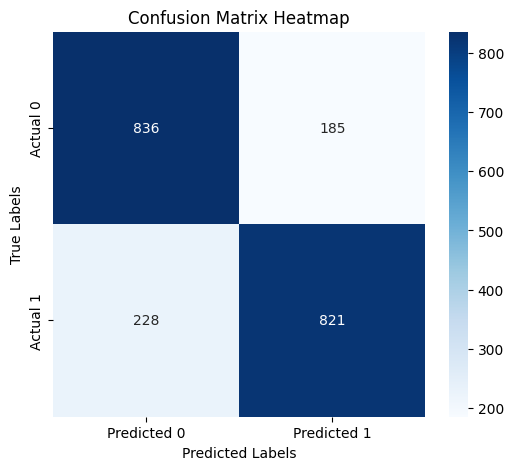

In [80]:
#Generate confusion matrix
cm = confusion_matrix(y_test_smote, yp)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

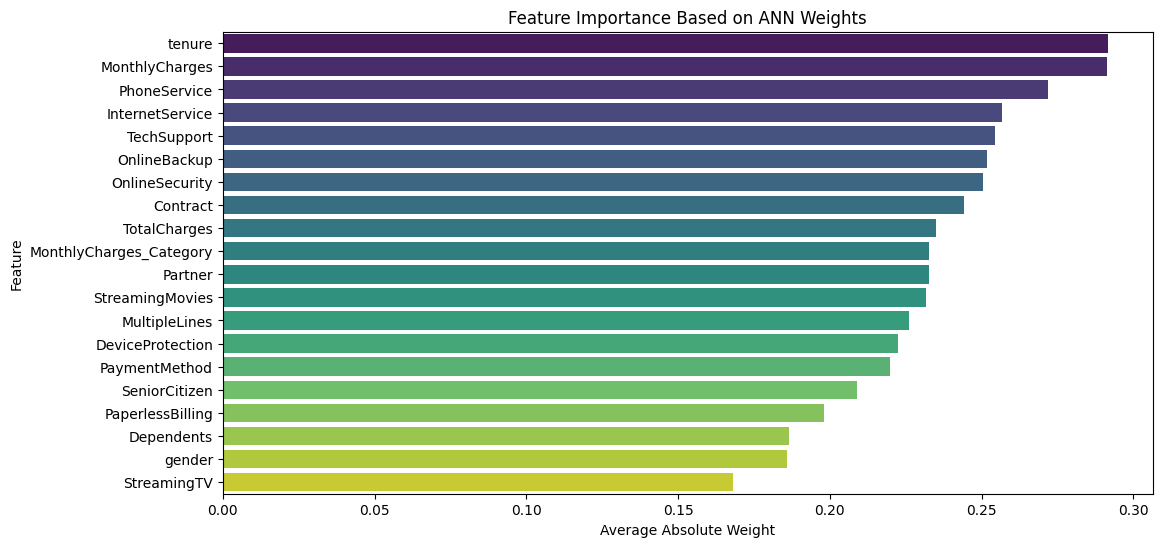

In [84]:
# Extract weights from the first layer of the ANN model
ann_weights = model_ann.layers[0].get_weights()[0]  # Get weight matrix

# Compute mean absolute weight for each feature
feature_importance = np.mean(np.abs(ann_weights), axis=1)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance Based on ANN Weights")
plt.xlabel("Average Absolute Weight")
plt.ylabel("Feature")
plt.show()


# **CNN**

In [65]:
# Convolutional Neural Network (CNN)
model_cnn=keras.models.Sequential(
    [
        keras.layers.Reshape((X_train_smote.shape[1], 1), input_shape=(X_train_smote.shape[1],)),
         keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
         keras.layers.Flatten(),
         keras.layers.Dense(64, activation='relu'),
         keras.layers.Dropout(0.3),
         keras.layers.Dense(1, activation='sigmoid')
    ]
)
model_cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [66]:
model_cnn.fit(X_train_smote,y_train_smote,epochs=50)

Epoch 1/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7525 - loss: 0.5032
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7808 - loss: 0.4514
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.4458
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7857 - loss: 0.4445
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7997 - loss: 0.4326
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8021 - loss: 0.4284
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7962 - loss: 0.4368
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8048 - loss: 0.4342
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8111 - loss: 0.4271
Epoch 10/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7967 - loss: 0.4264
Epoch 11/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8045 - loss: 0.4261
Epoch 12/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [67]:
model_cnn.evaluate(X_test,y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7613 - loss: 0.5063


[0.5272445678710938, 0.7494677305221558]

In [82]:
cnn_accuracy = accuracy_score(y_test_smote, (model_cnn.predict(X_test_smote) > 0.5).astype("int32"))

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [85]:
yp_cnn = (model_cnn.predict(X_test_smote) > 0.5).astype("int32")
report_cnn = classification_report(y_test_smote, yp_cnn)
print(report_cnn)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1021
           1       0.82      0.86      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



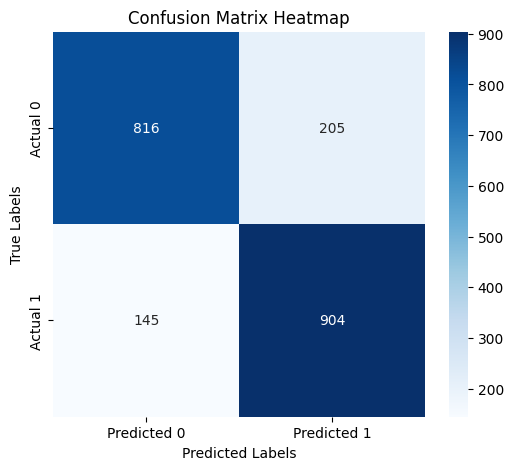

In [86]:
#Generate confusion matrix
cm = confusion_matrix(y_test_smote, yp_cnn)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, LSTM, Dense, Dropout
lstm_model=Sequential([
        Reshape((X_train_smote.shape[1], 1), input_shape=(X_train_smote.shape[1],)),
        LSTM(50, return_sequences=False),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_data=(X_test_smote, y_test_smote), verbose=1)

Epoch 1/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6621 - loss: 0.6202 - val_accuracy: 0.7271 - val_loss: 0.5472
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7230 - loss: 0.5527 - val_accuracy: 0.7488 - val_loss: 0.5169
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7220 - loss: 0.5520 - val_accuracy: 0.7556 - val_loss: 0.5130
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7342 - loss: 0.5407 - val_accuracy: 0.7522 - val_loss: 0.5063
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7483 - loss: 0.5342 - val_accuracy: 0.7710 - val_loss: 0.4868
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7604 - loss: 0.5038 - val_accuracy: 0.7652 - val_loss: 0.4894
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7463 - loss: 0.5203 - val_accuracy: 0.7797 - val_loss: 0.4764
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7612 - loss: 0.4978 - val_accu

In [72]:
lstm_accuracy = accuracy_score(y_test_smote, (lstm_model.predict(X_test_smote) > 0.5).astype("int32"))

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


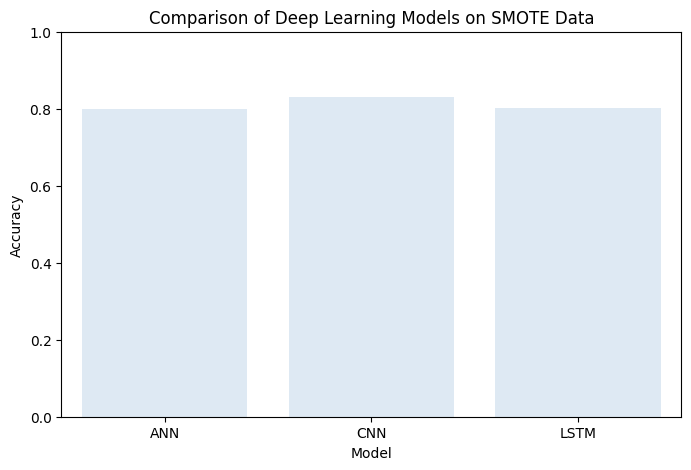

In [83]:
# Visualization
results = pd.DataFrame({
    "Model": ["ANN", "CNN", "LSTM"],
    "Accuracy": [ann_accuracy, cnn_accuracy, lstm_accuracy]
})

plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=results)
plt.title("Comparison of Deep Learning Models on SMOTE Data")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()
